# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle


training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Loaded Data sucessfully!")
print("Shape of the training images array: ", X_train.shape)


Loaded Data sucessfully!
Shape of the training images array:  (34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
from collections import Counter
import matplotlib.pyplot as plt

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(Counter(y_train).keys())

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Basic visualization of the dataset

Text(0.5,1,'Number of available samples for each label in test set')

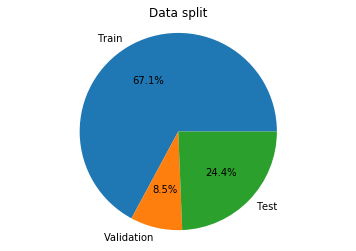

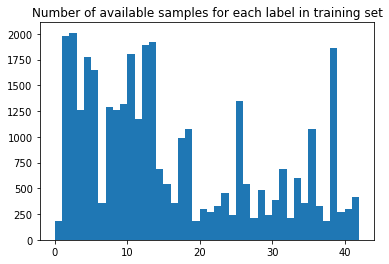

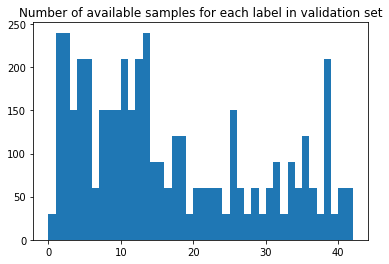

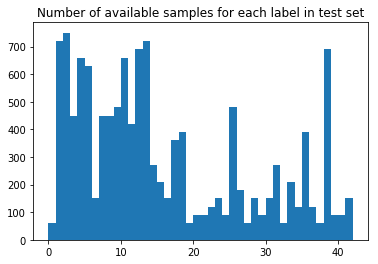

In [6]:
# Visualize the split of all the datat to train, validation and test sets
visualization_labels = ["Train", "Validation", "Test"]
plt.figure()
plt.pie([n_train, n_validation, n_test], labels = visualization_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Data split")

# Visualize how many training examples are available for each class
plt.figure()
plt.hist(y_train, bins=n_classes-1)
plt.title("Number of available samples for each label in training set")

# Visualize how many validation examples are available for each class
plt.figure()
plt.hist(y_valid, bins=n_classes-1)
plt.title("Number of available samples for each label in validation set")

# Visualize how many test examples are available for each class
plt.figure()
plt.hist(y_test, bins=n_classes-1)
plt.title("Number of available samples for each label in test set")

Example image of the class:  4


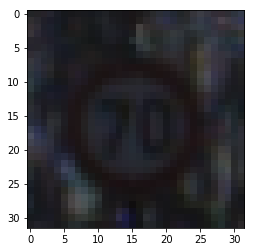

In [7]:
import random

# Plot random example image and its class

index =random.randint(0, len(X_train)-1)

plt.imshow(X_train[index])
print("Example image of the class: ", y_train[index])

----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set

Class:  0
min: 0.176470588235
max: 0.972549019608


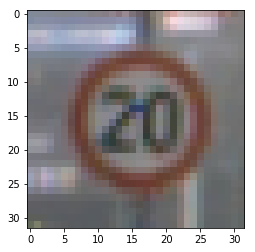

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np

# Normalize the data

X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_valid_norm = X_valid / 255


# print(X_train_norm)
plt.imshow(X_train_norm[10000])
print("Class: ", y_train[10000])

print("min:", np.min(X_train_norm[10000]))
print("max:", np.max(X_train_norm[10000]))

### Model Architecture

The base for this model is the LeNet by Ian LeCun. I did hovewer modify the net size in order to increase its learning capability. 

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    # DROPOUT
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x10. Output = 14x14x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x20.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 20), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(20))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # DROPOUT
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x20. Output = 5x5x20.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x20. Output = 500.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 500. Output = 150.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(500, 150), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(150))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # DROPOUT
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 150. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(150, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # DROPOUT
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

### Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [10]:
import tensorflow as tf

EPOCHS = 80
BATCH_SIZE = 256

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Keep probability param for Dropout
keep_prob = tf.placeholder(tf.float32)



## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.



In [12]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [15]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.343

EPOCH 2 ...
Validation Accuracy = 0.516

EPOCH 3 ...
Validation Accuracy = 0.634

EPOCH 4 ...
Validation Accuracy = 0.728

EPOCH 5 ...
Validation Accuracy = 0.762

EPOCH 6 ...
Validation Accuracy = 0.809

EPOCH 7 ...
Validation Accuracy = 0.827

EPOCH 8 ...
Validation Accuracy = 0.842

EPOCH 9 ...
Validation Accuracy = 0.883

EPOCH 10 ...
Validation Accuracy = 0.896

EPOCH 11 ...
Validation Accuracy = 0.899

EPOCH 12 ...
Validation Accuracy = 0.900

EPOCH 13 ...
Validation Accuracy = 0.908

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Below the performance of the net is measured for all teh subsets.

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    train_accuracy = evaluate(X_train_norm, y_train)
    validation_accuracy = evaluate(X_valid_norm, y_valid)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.996
Validation Accuracy = 0.956
Test Accuracy = 0.950


From this values it can be seen that the train accuracy is 4% higher validation and train accuracy. This means that the net is overfitting. To solve this problem the dropout rate during training could be increased.

---

## Step 3: Test a Model on New Images

I downloaded 5 random photos of traffic signs from the Internet and will now test how well the net perform on those.

### Load and Draw the Images

In [16]:
# Function to read the images and corresponding labels

import cv2
import glob


def read_images():
    images = glob.glob('traffic_signs/*.jpg')
    
    size = len(images)
    
    # Preapre variables
    labels = []
    img = np.empty((32,32,3), dtype = float)
    imgList = np.empty((size,32,32,3), dtype=float)

    i = 0

    for fname in images:
        # Read and preprocess the images
        img = cv2.imread(fname)
        img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.asarray(img)
        # Normalize the image to the range 0...1
        img = img.astype(float) / 255.0
        
        # Read the label from the filename
        name = fname.split(".")
        name = name[0][14:]

        labels.append(int(name))
        imgList[i] = img
        
        i = i + 1

    return labels, imgList
    


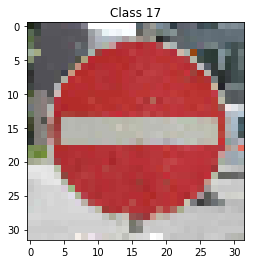

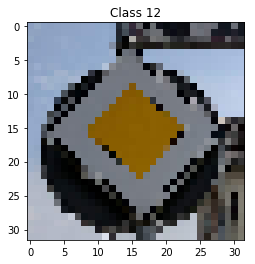

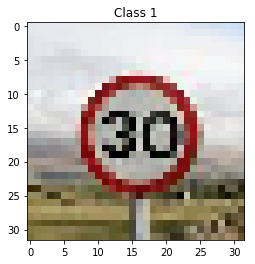

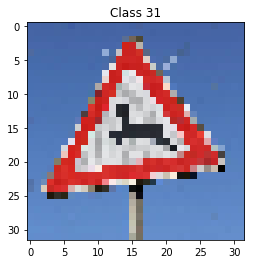

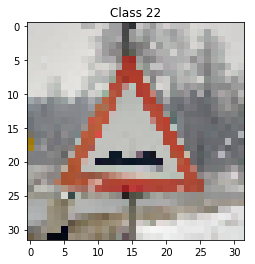

In [17]:
# Draw the images
imgList = np.empty((5,32,32,3), dtype=float)
labels = []
labels, imgList = read_images()
labels = np.array(labels)


for i in range(len(labels)):
    plt.figure()
    plt.imshow(imgList[i])
    plt.title("Class " + str(labels[i]))

### Analyze the overall performance of the classifier on the new images

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_accuracy = evaluate(imgList, labels)
    print("Accuracy = {:.3f}".format(new_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy = 0.600


As can be seen, the accuracy is only 60% what means that 3 out of 5 images were recognized correctly. I will now analyze for which signs a mistake was made by looking into the top 5 softmax probabilities.

### Output Top 5 Softmax Probabilities For Each Image

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,  tf.train.latest_checkpoint('.'))
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: imgList, y: labels, keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [17]:
for m in range(len(labels)):
    print('Correct label: ', labels[m])
    for n in range(5):
        print(str(n+1)+'. ', top_k[1][m][n])
        print('   ', top_k[0][m][n])
    print()

Correct label:  17
1.  17
    1.0
2.  0
    7.41128e-08
3.  14
    4.36532e-09
4.  22
    7.16091e-11
5.  13
    4.17868e-11

Correct label:  12
1.  12
    1.0
2.  13
    3.10351e-11
3.  32
    1.28347e-12
4.  26
    5.58283e-13
5.  38
    3.12103e-13

Correct label:  1
1.  5
    0.242318
2.  1
    0.228904
3.  2
    0.217526
4.  7
    0.0738343
5.  8
    0.0659243

Correct label:  31
1.  20
    0.35386
2.  23
    0.165285
3.  17
    0.111904
4.  19
    0.109935
5.  26
    0.0447365

Correct label:  22
1.  22
    0.998056
2.  17
    0.00190448
3.  31
    2.21442e-05
4.  29
    1.47832e-05
5.  23
    2.47429e-06

